# 1. Conhecendo o conjunto de dados

[dataset](https://github.com/zalandoresearch/fashion-mnist) que será usado.

[THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)

Bases de dados:

- [keras](https://keras.io/api/datasets/)
- [kagle](https://keras.io/api/datasets/)

![](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [2]:
import tensorflow
from tensorflow import keras
import keras

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_testes)) = dataset.load_data()

imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
display(len(imagens_treino))
display(imagens_treino.shape)

60000

(60000, 28, 28)

In [4]:
display(len(imagens_teste))
display(imagens_teste.shape)

10000

(10000, 28, 28)

In [5]:
display(len(identificacoes_treino))
display(len(identificacoes_testes))

60000

10000

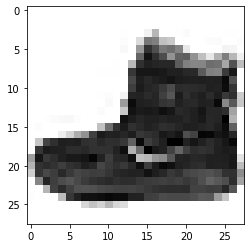

In [6]:
# Visualizando uma imagem:

import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0], cmap='binary')

Outras API de deep learning além do Keras:

- [Caffe](http://caffe.berkeleyvision.org/) do grupo de pesquisa da universidade de Berkeley,
- [Torch](http://torch.ch/) uma implementação usando Lua,
- [PyTorch](https://pytorch.org/) uma variação do Torch para Python,
- [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/) da Microsoft,
- [DL4J](https://deeplearning4j.org/) uma implementação usando Java,
- [MXNet](https://mxnet.incubator.apache.org/)  da Apache.

# 2. Começando a montar o modelo

In [7]:
intervalo = (identificacoes_treino.min(), identificacoes_treino.max())
total_de_classificacao = intervalo[1] - intervalo[0] + 1
total_de_classificacao

10

Text(0.5, 1.0, '9')

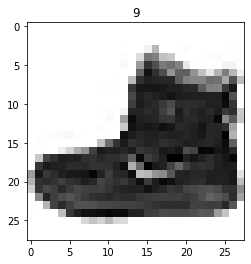

In [8]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0], cmap='binary')
plt.title(identificacoes_treino[0])

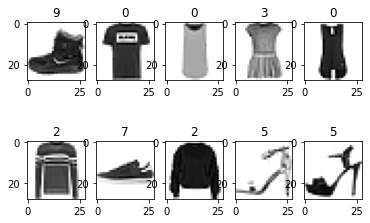

In [9]:
for imagem in range(total_de_classificacao):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem], cmap='binary')
    plt.title(identificacoes_treino[imagem])

Mas o que significa cada label desses? na documentação no [github](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md) nos diz o que significa cada um 

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

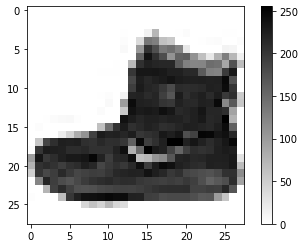

In [10]:
nomes_de_classificacao = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                          'Sandalha', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# for imagem in range(total_de_classificacao):
#     plt.subplot(2, 5, imagem+1)
#     plt.imshow(imagens_treino[imagem], cmap='binary')
#     plt.title(nomes_de_classificacao[identificacoes_treino[imagem]])
    
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()


In [11]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))]) 

[código](http://scipy-lectures.org/advanced/image_processing/) para pré processamento de imagens.

# 3. Adicionando camadas ocultas

## Adicionando a camada 1:

![](https://i.imgur.com/Hqrr4OX.png)

In [12]:
modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

# modelo.fit(imagens_treino, identificacoes_treino)

# 4. Ensinando o modelo

In [13]:
# Normalizando as imagens:
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4830


Camada oculta: Porque temos uma ideia do que pode estar acontecendo, mas não temos certeza absoluta de como está sendo este processamento. O máximo a que chegamos de visualizar o que pode estar acontecendo é saber que cada vez mais estas camadas adicionais irão agrupando mais características das nossas imagens, então elas começam com menos, e vão agrupando mais.

In [14]:
# melhorando a segunda camada.

# Normalização:
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(128, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(64, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.7828


# 5. Sabendo como medir o resultado do **modelo**

OBS: Os dados de testes também deveriam ser normalizados. Ver os seguintes links:

- [Alura](https://cursos.alura.com.br/forum/topico-imagens_treino-255-duvida-113920)
- [StackExchange](https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well)
- [Google](https://cloud.google.com/architecture/data-preprocessing-for-ml-with-tf-transform-pt1?hl=pt-br)

Por que a perda não diminuiu? 

Este é um detalhe do próprio Notebook que estamos usando; há mecanismos por baixo dele, que faz toda a execução, ou Runtime em inglês, que vai guardando o estado, ou números de variáveis que estão rodando por debaixo dos panos em nosso modelo, pois quando ele erra algo, ele tem umas variáveis aleatórias por detrás dele, que vão mudando de acordo com o que ele vai aprendendo. Logo para resolver isso basta reiniciar o kernel.

In [15]:
# melhorando a segunda camada.

# Normalização:
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3025 - accuracy: 0.1036
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2984 - accuracy: 0.1205
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2774 - accuracy: 0.2018
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2302 - accuracy: 0.2527
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1649 - accuracy: 0.2870


In [16]:
# Realizando os predict

import numpy as np

testes = modelo.predict(imagens_teste)
print(f"Resultado: {np.argmax(testes[2])}")
print(f"Número da imagem de teste: {identificacoes_testes[2]}")

Resultado: 0
Número da imagem de teste: 1


In [17]:
modelo.evaluate(imagens_teste, identificacoes_testes)

313/313 [==============================] - 1s 2ms/step - loss: 1817075.5000 - accuracy: 0.1011


[1817075.5, 0.10109999775886536]

A primeira posição que temos é a perda do nosso teste, e a segunda é a acurácia do mesmo

In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_testes)
print(f"perda_teste: {perda_teste} ")
print(f"Acurácia do teste: {acuracia_teste}")


313/313 [==============================] - 0s 1ms/step - loss: 1817075.5000 - accuracy: 0.1011: 0s - loss: 1791807.8750 - accuracy
perda_teste: 1817075.5 
Acurácia do teste: 0.10109999775886536


In [19]:
# Adicionando dados para validação:

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3020 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2994 - accuracy: 0.1213 - val_loss: 2.2944 - val_accuracy: 0.1030
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2830 - accuracy: 0.1723 - val_loss: 2.2675 - val_accuracy: 0.2140
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2431 - accuracy: 0.2256 - val_loss: 2.2149 - val_accuracy: 0.2637
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1833 - accuracy: 0.2550 - val_loss: 2.1483 - val_accuracy: 0.2878


Mas vejam que surgiram o val_loss e val_acc, o que será que eles são?

# 6. Ajustando e salvando o modelo

Para conseguirmos enxergar isso de maneira um pouco mais legal, pois aqui fica difícil entendermos se estamos indo bem ou mal, o que temos que ajustar ou não, podemos deixar tudo isso em um gráfico

In [20]:
# Adicionando dados para validação:

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3025 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3017 - accuracy: 0.1109 - val_loss: 2.3005 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2973 - accuracy: 0.1339 - val_loss: 2.2928 - val_accuracy: 0.1982
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2857 - accuracy: 0.1820 - val_loss: 2.2762 - val_accuracy: 0.2328
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2637 - accuracy: 0.2094 - val_loss: 2.2490 - val_accuracy: 0.2488


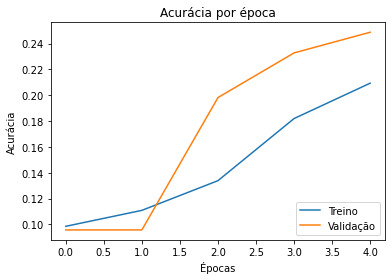

In [21]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

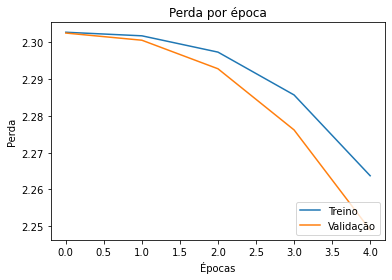

In [22]:
# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [23]:
# Aumentando o número de épocas

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3023 - accuracy: 0.1017 - val_loss: 2.3016 - val_accuracy: 0.1199
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3002 - accuracy: 0.1174 - val_loss: 2.2982 - val_accuracy: 0.0957
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2956 - accuracy: 0.1501 - val_loss: 2.2922 - val_accuracy: 0.1758
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2878 - accuracy: 0.1790 - val_loss: 2.2823 - val_accuracy: 0.1909
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2763 - accuracy: 0.1988 - val_loss: 2.2695 - val_accuracy: 0.2157
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2619 - accuracy: 0.2048 - val_loss: 2.2531 - val_accuracy:

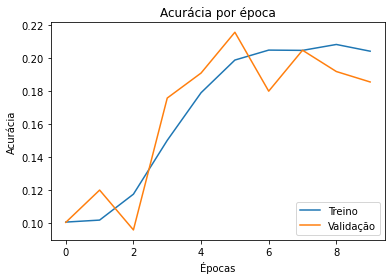

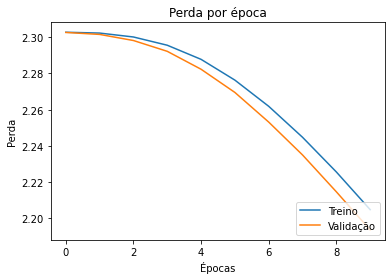

In [24]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [25]:
# Vamos deixar as épocaso onde parece está mais estável. 
# Adicionando um Dropout para reduzir o overfitting e fazer nossos neurônios adormecerem um pouco.

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3021 - accuracy: 0.1037 - val_loss: 2.3011 - val_accuracy: 0.1005
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2986 - accuracy: 0.1264 - val_loss: 2.2947 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2874 - accuracy: 0.1631 - val_loss: 2.2777 - val_accuracy: 0.2146
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2654 - accuracy: 0.2003 - val_loss: 2.2490 - val_accuracy: 0.2139


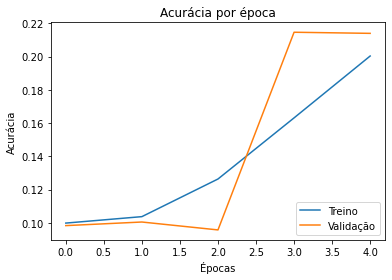

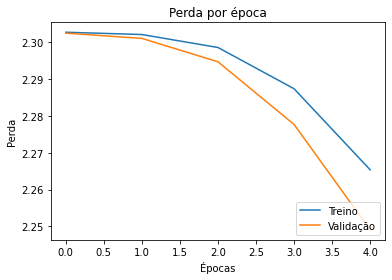

In [26]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()


In [27]:
modelo.save('modelo.h5')
modelo_salvo = keras.models.load_model('modelo.h5')

In [28]:
# Realizando os predict com o modelo salvo

import numpy as np

testes = modelo.predict(imagens_teste)
print(f"Resultado: {np.argmax(testes[1])}")
print(f"Número da imagem de teste: {identificacoes_testes[1]}")

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f"Resultado modelo salvo: {np.argmax(testes_modelo_salvo[1])}")
print(f"Número da imagem de teste: {identificacoes_testes[1]}")

Resultado: 4
Número da imagem de teste: 2
Resultado modelo salvo: 4
Número da imagem de teste: 2


# 7. Revisando conceitos chave

# Termina aqui

# Curso Deep Learning parte 2: Como a rede aprende

## 1. Indo por dentro da rede neural 

![](https://miro.medium.com/max/1280/1*VF9xl3cZr2_qyoLfDJajZw.gif)

In [29]:
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Olhando para a última coluna, temos parâmetros, variáveis. A primeiro linha é zero, porque não aconteceu muita coisa. Na dense vamos fazer uma conta. Temos 784 valores iniciais, e teremos 256 neurônios na nossa rede que vão receber. Podemos multiplicar uma pela outra, e vai dar 200.704. Fica diferente do valor do dense.

Esssa diferença são os pesos que temos para que nossa rede aprenda.   

In [30]:
# Vamos analisar os pesos:

modelo.layers[1].get_weights()[0]

array([[ 0.04566608,  0.07460262, -0.01525154, ...,  0.0701234 ,
         0.0589561 , -0.02680483],
       [ 0.05289222, -0.00874674,  0.0543796 , ...,  0.04690319,
        -0.05877396,  0.06309083],
       [-0.00118528,  0.01158418, -0.05547005, ...,  0.04228351,
         0.01907169,  0.01316901],
       ...,
       [ 0.04388639, -0.04476643,  0.02668326, ..., -0.06897868,
        -0.07572039, -0.03395109],
       [ 0.00511989, -0.03879774,  0.04611401, ...,  0.04411955,
         0.04080418, -0.07388338],
       [ 0.04798917,  0.03630919,  0.04387187, ..., -0.03737205,
        -0.04250013, -0.06225351]], dtype=float32)

In [31]:
# Sumário do modelo:
sumario_do_modelo = modelo.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Pesos da primeira camada dense:
pesos_camada_dense = modelo.layers[1].get_weights()[0]


# 2. Estudando pesos e vieses

Muitas vezes uma classificação está mais próxima de um objeto que de outro. Se fizéssemos um modelo e classificássemos a saia como sandália, erraríamos muito. Alguma medida vai aumentar ou diminuir. Nesse caso, como a saia está bem distante da sandália, ela vai ficar muito grande. Quanto mais distante ficarmos do resultado, maior a medida e mais nosso modelo está tendenciando para um lado. Isso é o viés.

get_weights()[0] -> Pesos

get_weights()[1] -> Vieses

In [33]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-0.00600059, -0.00385402, -0.00341564, -0.00600382, -0.00600244,
       -0.00600255, -0.00553722, -0.00106178, -0.00480289, -0.00600454,
       -0.00600283, -0.00501136, -0.00600253, -0.00370974, -0.00247449,
       -0.00600354, -0.00301388, -0.00600377, -0.00111595, -0.00531449,
       -0.00600404, -0.00600334, -0.00600124, -0.00331995, -0.00401346,
       -0.0059988 , -0.00172459, -0.00599968, -0.00600302, -0.0030987 ,
       -0.00600421, -0.00685926, -0.00133658, -0.00600373, -0.00650868,
       -0.00052307, -0.0045188 , -0.00534192, -0.00698248, -0.00350914,
       -0.00469122, -0.00234955, -0.00599829, -0.00600173, -0.00189734,
       -0.0060028 , -0.0052336 , -0.00569197, -0.00598242, -0.00365504,
       -0.00600361,  0.00713337, -0.00174191, -0.0060004 , -0.00167621,
       -0.00315961, -0.00410037, -0.00583146, -0.00599033, -0.00276928,
       -0.00600361, -0.00260588, -0.00055557, -0.00475284, -0.00600271,
       -0.0048557 , -0.00599815, -0.00597885, -0.00083162, -0.00

In [34]:
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.00600059, -0.00385402, -0.00341564, -0.00600382, -0.00600244,
        -0.00600255, -0.00553722, -0.00106178, -0.00480289, -0.00600454,
        -0.00600283, -0.00501136, -0.00600253, -0.00370974, -0.00247449,
        -0.00600354, -0.00301388, -0.00600377, -0.00111595, -0.00531449,
        -0.00600404, -0.00600334, -0.00600124, -0.00331995, -0.00401346,
        -0.0059988 , -0.00172459, -0.00599968, -0.00600302, -0.0030987 ,
        -0.00600421, -0.00685926, -0.00133658, -0.00600373, -0.00650868,
        -0.00052307, -0.0045188 , -0.00534192, -0.00698248, -0.00350914,
        -0.00469122, -0.00234955, -0.00599829, -0.00600173, -0.00189734,
        -0.0060028 , -0.0052336 , -0.00569197, -0.00598242, -0.00365504,
      

In [35]:

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2979 - accuracy: 0.1161 - val_loss: 2.2913 - val_accuracy: 0.1955
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2838 - accuracy: 0.1497 - val_loss: 2.2739 - val_accuracy: 0.1845
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2619 - accuracy: 0.1833 - val_loss: 2.2460 - val_accuracy: 0.2155
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2309 - accuracy: 0.1990 - val_loss: 2.2095 - val_accuracy: 0.2197
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1920 - accuracy: 0.2080 - val_loss: 2.1682 - val_accuracy: 0.2091


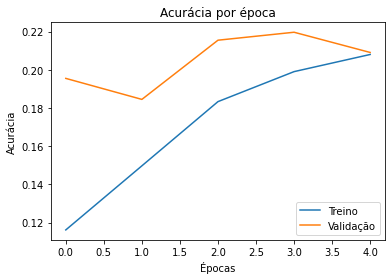

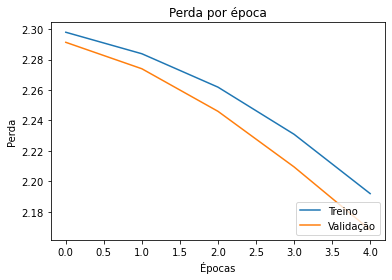

In [36]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

Temos nossos dados de validação perdendo mais que os dados de treino. Repare que se zeramos, os pesos da nossa rede, que são aquilo pelos quais estamos multiplicando nossas entradas para definir as mais e menos importantes, não estamos diferenciando isso. É difícil a rede performar bem. A inicialização dos pesos com zero é o que as pessoas chamam de manter a simetria da rede. Ela deve ser quebrada para termos resultados mais interessantes. Temos que priorizar coisas. Quando zeramos, deixamos tudo igual.



In [37]:
# Inicializando nossa rede com valores aletaórios.

pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.3292729 , 0.68485385, 0.9307983 , ..., 0.22845143, 0.27129182,
         0.49216017],
        [0.3966557 , 0.25666362, 0.22107416, ..., 0.6667527 , 0.9306339 ,
         0.23585494],
        [0.8829918 , 0.5593224 , 0.8423362 , ..., 0.02591216, 0.09208529,
         0.3278826 ],
        ...,
        [0.30079862, 0.52279055, 0.5271938 , ..., 0.38144374, 0.8059147 ,
         0.5713897 ],
        [0.2032346 , 0.4481398 , 0.5777944 , ..., 0.55716753, 0.8655153 ,
         0.7450086 ],
        [0.5826356 , 0.8280942 , 0.02261467, ..., 0.12625293, 0.38844642,
         0.791291  ]], dtype=float32),
 array([-0.00600059, -0.00385402, -0.00341564, -0.00600382, -0.00600244,
        -0.00600255, -0.00553722, -0.00106178, -0.00480289, -0.00600454,
        -0.00600283, -0.00501136, -0.00600253, -0.00370974, -0.00247449,
        -0.00600354, -0.00301388, -0.00600377, -0.00111595, -0.00531449,
        -0.00600404, -0.00600334, -0.00600124, -0.00331995, -0.00401346,
        -0.0059988 , -0.00172

Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 2.2845 - accuracy: 0.1381 - val_loss: 2.2643 - val_accuracy: 0.1507
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 2.2321 - accuracy: 0.2142 - val_loss: 2.1863 - val_accuracy: 0.2385
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1306 - accuracy: 0.2588 - val_loss: 2.0647 - val_accuracy: 0.3041
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0061 - accuracy: 0.3108 - val_loss: 1.9381 - val_accuracy: 0.3338
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8865 - accuracy: 0.3565 - val_loss: 1.8227 - val_accuracy: 0.3939


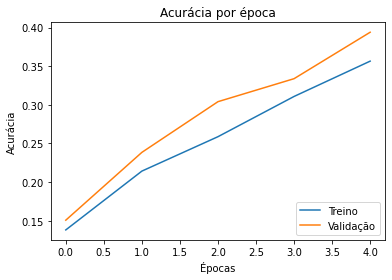

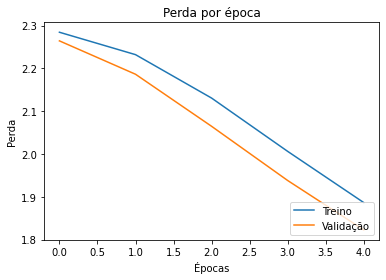

In [38]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [39]:
# O que o keras faz?

modelo.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_8_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_8',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_16',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
   

Ler o [artigo](https://chaithanyakumars.medium.com/understanding-the-difficulty-of-training-deep-feed-forward-neural-networks-e4545690b4d5) explicando por que utiliza-se GlorotUniform.

Ler o [artigo](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/) a respeito dos gradientes explosivos.

Ler [artigo](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf) a respeito de GlorotUniform.

# 3. Entendendo as unidades e buscando a menor perda


In [40]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [41]:

vieses_camada_dense_zerados = np.zeros((256,))

modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4316 - accuracy: 0.1004 - val_loss: 2.3211 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3064 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0957


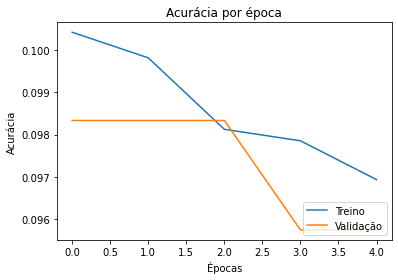

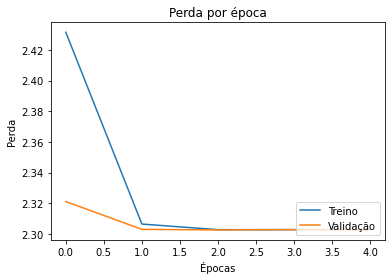

In [42]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.1910 - accuracy: 0.2037 - val_loss: 2.0965 - val_accuracy: 0.2944
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0088 - accuracy: 0.2972 - val_loss: 1.9054 - val_accuracy: 0.3418
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8218 - accuracy: 0.3667 - val_loss: 1.7217 - val_accuracy: 0.3931
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6506 - accuracy: 0.4129 - val_loss: 1.5535 - val_accuracy: 0.4313
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5141 - accuracy: 0.4510 - val_loss: 1.4356 - val_accuracy: 0.4762


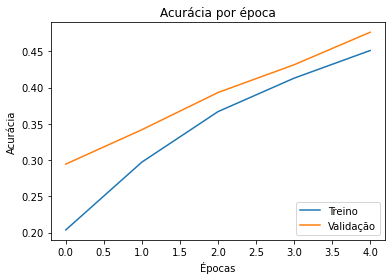

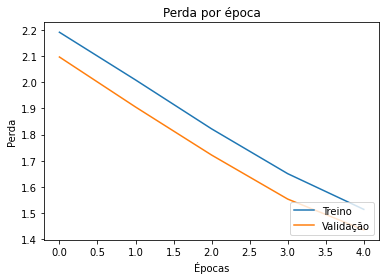

In [43]:

vieses_camada_dense_zerados = np.zeros((256,))

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

 Ficamos de ver o que acontecia por debaixo dos panos com nossa função de ativação ReLU. Ela está zerada e dependendo dos inputs que receber vai transformar as saídas. Quando fazemos uma multiplicação, alteramos o quanto ela está inclinada no eixo. Do mesmo modo quando fazemos uma soma. Vamos ter valores maiores ou menores aqui.

 ![](https://i.imgur.com/GCHej3b.png)

 ![](https://i.imgur.com/E4wi4GH.png)

 ![](https://i.imgur.com/OG0TOXX.png)

 ![](https://i.imgur.com/qnmHVyC.png)

 ![](https://i.imgur.com/OH8rfNF.png)

# 4. Como o modelo fica ótimo

# 5. Testando os hiperparâmetros da rede

Documentação [callbacks](https://keras.io/api/callbacks/) 

In [57]:
# Alterando a learning rate
# Alterando também o batch size

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

In [84]:
adam = keras.optimizers.Adam(lr=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, min_delta=10)
            #  keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)
            ]

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size=480, callbacks=callbacks,
                       epochs=100, validation_split=0.2)

Epoch 1/100
100/100 [==============================] - 1s 10ms/step - loss: 1.2478 - accuracy: 0.5103 - val_loss: 1.1316 - val_accuracy: 0.6043
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 1.2430 - accuracy: 0.5110 - val_loss: 1.1275 - val_accuracy: 0.6033


In [54]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                     epochs=10, batch_size=1, callbacks=[callback],
                     verbose=0)
